# PSP-Lab3: Zero-Phase Filter

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 时长为1秒
t = 1
# 采样率为60hz
fs = 60
t_split = np.arange(0, t * fs)


# 1hz与25hz叠加的正弦信号
x_1hz = t_split * 1 * np.pi * 2 / fs
x_25hz = t_split * 25 * np.pi * 2 / fs
signal_sin_1hz = np.sin(x_1hz)
signal_sin_25hz = np.sin(x_25hz)

signal_sin = signal_sin_1hz + 0.25 * signal_sin_25hz


In [ ]:
# FIR filter parameters
NYQUIST_RATE = fs / 2
PASSBAND_EDGE = 10 / NYQUIST_RATE
STOPBAND_EDGE = 22 / NYQUIST_RATE
STOPBAND_ATTENUATION = 44
WINDOW_LENGTH = 17


In [ ]:
# 通带边缘频率为10Hz，
# 阻带边缘频率为22Hz，
# 阻带衰减为44dB，窗内项数为17的汉宁窗函数
# 构建低通滤波器
# 函数需要返回滤波后的信号
def filter_fir(input):
    # Use global constants instead of hardcoded values
    n_values = np.arange(-(WINDOW_LENGTH // 2), (WINDOW_LENGTH // 2) + 1)

    # Calculate cutoff frequency as midpoint between passband and stopband edges
    cutoff_freq = (PASSBAND_EDGE + STOPBAND_EDGE) * NYQUIST_RATE / 2
    wc = 2 * np.pi * cutoff_freq / fs

    # Calculate ideal lowpass filter coefficients
    filter_coefficients = np.where(
        n_values == 0, wc / np.pi, np.sin(wc * n_values) / (np.pi * n_values)
    )

    # Apply Hanning window
    hanning_window = 0.5 + 0.5 * np.cos(2 * np.pi * n_values / (WINDOW_LENGTH - 1))
    filter_with_window = filter_coefficients * hanning_window

    # Apply filter and trim to match input length
    filtered_signal = np.convolve(input, filter_with_window)[: len(input)]
    return filtered_signal


# 首先正向对信号滤波(此时输出信号有一定相移)
# 将输出信号反向，再次用该滤波器进行滤波
# 再将输出信号反向
# 函数需要返回零相位滤波后的信号
def filter_zero_phase(input):
    forward_filtered = filter_fir(input)
    reversed_signal = np.flip(forward_filtered)
    double_filtered = filter_fir(reversed_signal)
    zero_phase_signal = np.flip(double_filtered)
    return zero_phase_signal


/tmp/ipykernel_2960259/889935815.py:16: RuntimeWarning: invalid value encountered in divide
  n_values == 0, wc / np.pi, np.sin(wc * n_values) / (np.pi * n_values)


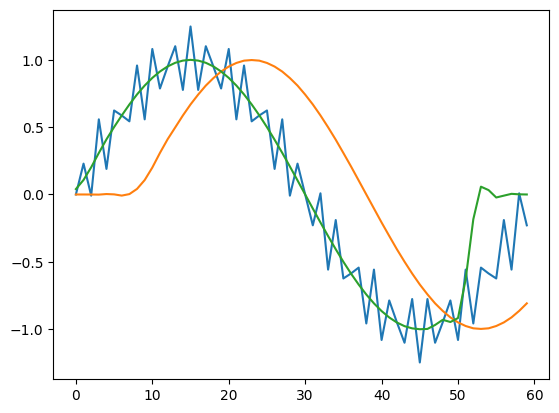

In [ ]:
if __name__ == "__main__":
    delay_filtered_signal = filter_fir(signal_sin)
    zerophase_filtered_signal = filter_zero_phase(signal_sin)

    plt.plot(t_split, signal_sin, label="origin")
    plt.plot(t_split, delay_filtered_signal, label="fir")
    plt.plot(t_split, zerophase_filtered_signal, label="zero phase")

    plt.show()
